<a href="https://colab.research.google.com/github/prabhhav/AI-Data-Science-Projects/blob/main/Prabhhav_Project_6_Custom_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from zipfile import ZipFile
from tqdm import tqdm

In [ ]:
!ls

ezyzip	ezyzip.zip  sample_data


In [ ]:
os.listdir()

['.config', 'ezyzip', '.ipynb_checkpoints', 'ezyzip.zip', 'sample_data']

In [ ]:
import shutil
if(os.path.isdir("ezyzip")):
  shutil.rmtree("ezyzip", ignore_errors=False, onerror=None)

In [ ]:
os.path.isdir("ezyzip")

False

In [ ]:
root_path = "ezyzip.zip"

In [ ]:
def uncompress_features_labels(dir,name):
  if(os.path.isdir("ezyzip")):
    print("Data Extracted")
  else:
     with ZipFile(dir) as zipf:
       zipf.extractall(name)


In [ ]:
uncompress_features_labels(root_path,'ezyzip')

In [ ]:
DATADIR = "ezyzip/Data"
CATEGORIES = os.listdir("ezyzip/Data")
IMG_SIZE = 224

In [ ]:
os.listdir(DATADIR)

['Cruise', 'Plane']

In [ ]:
CATEGORIES

['Cruise', 'Plane']

Create Training Data

In [ ]:
training_data = []

for category in CATEGORIES:
  print(category)
  path = os.path.join(DATADIR, category)
  print(path)
  class_num = CATEGORIES.index(category)
  print(class_num)

  for img in tqdm(os.listdir(path)):
    print(img)
    img_path = os.path.join(path,img)
    img_array = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
    new_image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    training_data.append([new_image, class_num])

 20%|██        | 3/15 [00:00<00:00, 27.52it/s]

Cruise
ezyzip/Data/Cruise
0
ship3.jfif
ship6.jfif
ship12.jfif
ship.jfif
ship5.jfif
ship14.jfif
ship4.jfif
ship15.jfif
ship8.jfif


 73%|███████▎  | 11/15 [00:00<00:00, 33.93it/s]

ship9.jfif
ship11.jfif
ship10.jfif
ship13.jfif
ship7.jfif


  7%|▋         | 1/15 [00:00<00:01,  8.29it/s]

ship2.jfif
Plane
ezyzip/Data/Plane
1
plane7.jfif
Plane4.jfif


 33%|███▎      | 5/15 [00:00<00:00, 10.29it/s]

Plane15.jfif
Plane14.jfif
Plane2.jpg
Plane5.jfif
Plane9.jfif
Plane11.jfif


 73%|███████▎  | 11/15 [00:00<00:00, 14.43it/s]

Plane6.jfif
Plane3.jfif
Plane12.jfif
Plane10.jfif


100%|██████████| 15/15 [00:00<00:00, 23.46it/s]

Plane8.jfif
Plane1.jfif
Plane13.jfif


In [ ]:
len(training_data)

30

In [ ]:
training_data[0][0]

array([[[216, 193, 167],
        [216, 193, 167],
        [218, 195, 169],
        ...,
        [225, 202, 180],
        [221, 203, 180],
        [221, 203, 180]],

       [[216, 193, 167],
        [216, 193, 167],
        [218, 195, 169],
        ...,
        [225, 202, 180],
        [221, 203, 180],
        [221, 203, 180]],

       [[216, 193, 167],
        [218, 195, 169],
        [218, 195, 169],
        ...,
        [225, 202, 180],
        [221, 203, 180],
        [221, 203, 180]],

       ...,

       [[ 75,  44,   9],
        [ 83,  50,  16],
        [ 77,  52,  10],
        ...,
        [ 84,  49,   3],
        [133,  98,  51],
        [120,  84,  36]],

       [[ 82,  54,  13],
        [ 83,  54,  13],
        [ 82,  54,  13],
        ...,
        [ 94,  56,   2],
        [ 80,  49,   9],
        [ 72,  45,   8]],

       [[ 82,  54,  13],
        [ 76,  48,   7],
        [ 75,  44,  12],
        ...,
        [ 99,  59,   4],
        [ 92,  58,   8],
        [ 97,  61,   5]]

In [ ]:
training_data[0][0].shape

(224, 224, 3)

Shuffle the data or else the order of the image may affect the performance of the network

Basic methods for training to train a model with this dataset you will want the data
* To be well shuffled
* To be batched 
* Batches to be available as soon as possible

In [ ]:
# b4 shuffle 
for sample in training_data[:10]:
  print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
images = []
labels = []

for features,label in training_data:
  images.append(features)
  labels.append(label)

In [ ]:
labels

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1]

In [ ]:
# input
X = np.array(images)
X = X/255

# output
y = np.array(labels)

In [ ]:
X.shape

(30, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 224, 224, 3)
(6, 224, 224, 3)
(24,)
(6,)


In [ ]:
print(y_train)
print(y_test)

[0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0]
[1 1 1 0 1 0]


In [ ]:
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import Adam


In [ ]:
import tensorflow.keras.layers as layers
from keras.models import Sequential

Classification using Pre Trained Models

In [ ]:
import tensorflow_hub as hub
import matplotlib.pylab as plt
import tensorflow as tf

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

classifier = tf.keras.Sequential([
                                  hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [ ]:
result = classifier.predict(X_train)

In [ ]:
len(result)

24

In [ ]:
len(result[0])

1001

In [ ]:
X_train.shape

(24, 224, 224, 3)

In [ ]:
X_train[0].shape

(224, 224, 3)

In [ ]:
predicted_class = np.argmax(result, axis=-1)
predicted_class

array([629, 629, 629, 629, 629, 896, 629, 405, 896, 629, 405, 405, 896,
       629, 629, 405, 405, 405, 629, 629, 405, 629, 405, 629])

In [ ]:
imagenet_labels[629]

'liner'

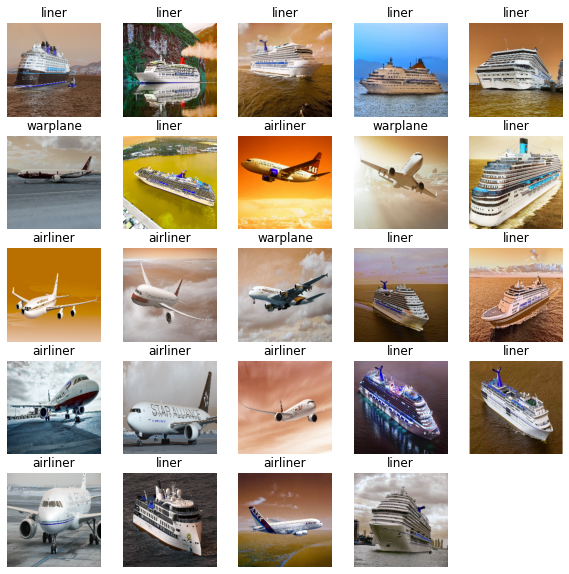

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for image, label, i in zip(X_train, predicted_class, range(len(X_train))):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image)
  plt.title(imagenet_labels[label])
  plt.axis("off")

Retrain model using Pretrained Model

In [ ]:
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

In [ ]:
IMAGE_RES = 224

In [ ]:
mobile_model = tf.keras.Sequential([
                      hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3)),
                      tf.keras.layers.Dense(2, activation='softmax')])

In [ ]:
mobile_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
mobile_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
 #EPOCHS = 6
 #history = mobile_model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

NameError: ignored

In [ ]:
mobile_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.9834 - accuracy: 0.2917 - val_loss: 0.8367 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.7526 - accuracy: 0.4583 - val_loss: 0.6562 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.5630 - accuracy: 0.7083 - val_loss: 0.5055 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.4128 - accuracy: 0.8750 - val_loss: 0.3839 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.2983 - accuracy: 0.9583 - val_loss: 0.2893 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.2141 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.1540 - accuracy: 1.0000 - val_loss: 0.1653 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=========================

In [ ]:
result = mobile_model.predict(X_test)

In [ ]:
result

array([[0.02667526, 0.9733247 ],
       [0.0028603 , 0.9971397 ],
       [0.03024924, 0.96975076],
       [0.98711246, 0.01288757],
       [0.01456592, 0.98543406],
       [0.98989266, 0.0101073 ]], dtype=float32)

In [ ]:
predicted_class = np.argmax(result, axis=-1)
predicted_class

array([1, 1, 1, 0, 1, 0])

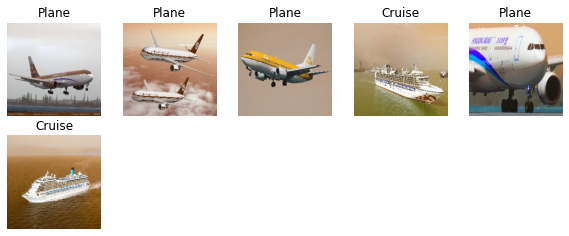

In [ ]:
plt.figure(figsize=(10,10))
for image, label, i in zip(X_test, predicted_class, range(len(X_test))):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image)
  plt.title(CATEGORIES[label])
  plt.axis("off")

Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                  input_shape=(IMG_SIZE,
                                                               IMG_SIZE,
                                                               3)),
     layers.experimental.preprocessing.RandomRotation(0.2),
     layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [ ]:
len(X_train)

24

In [ ]:
augmented_images = data_augmentation(X_train)
len(augmented_images)

24

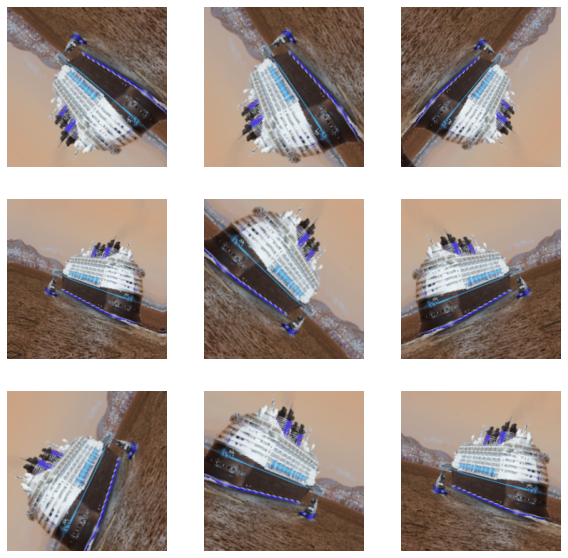

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_images = data_augmentation(X_train)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0])
  plt.axis("off")

CNN

In [ ]:
cnn_model = tf.keras.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units=128, activation='relu'))

cnn_model.add(layers.Dense(units=len(CATEGORIES), activation='softmax'))


In [ ]:
cnn_model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

#cnn_model.compile(loss='mean_squared_error',  optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.6829 - accuracy: 0.5417 - val_loss: 1.7926 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.5978 - accuracy: 0.7083 - val_loss: 58.3025 - val_accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 33.5748 - accuracy: 0.5417 - val_loss: 21.1213 - val_accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 10.0337 - accuracy: 0.5417 - val_loss: 2.8918 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 3.4506 - accuracy: 0.4583 - val_loss: 1.8140 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 2.2313 - accuracy: 0.5000 - val_loss: 0.3221 - val_accuracy: 0.8333
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.1817 - accuracy: 0.9167 - val_loss: 3.8143 - val_accuracy: 0.3333
Epoch 8/20
1/1 [=====================

In [ ]:
cnn_model.predict(X_test)

array([[0.07210848, 0.92789155],
       [0.41270185, 0.58729815],
       [0.02352044, 0.9764796 ],
       [0.47983196, 0.52016807],
       [0.826296  , 0.17370401],
       [0.9959376 , 0.00406242]], dtype=float32)

In [ ]:
y_hat_test = np.argmax(cnn_model.predict(X_test), axis=-1)

In [ ]:
y_test

array([1, 1, 1, 0, 1, 0])

In [ ]:
y_hat_test

array([1, 1, 1, 1, 0, 0])

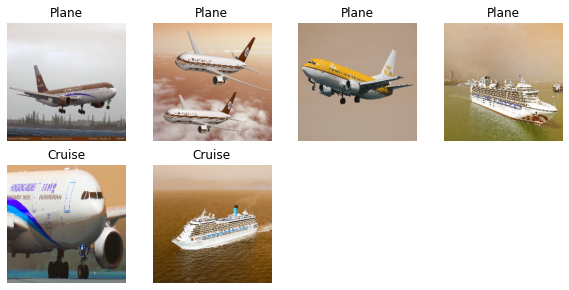

In [ ]:
plt.figure(figsize=(10,10))
for image, label, i in zip(X_test, y_hat_test, range(len(X_test))):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(CATEGORIES[label])
  plt.axis("off")

In [ ]:
y_hat_train = cnn_model.predict(X_train)
print(y_train)
print(np.argmax(y_hat_train, axis=-1))

[0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0]
[0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(y_test, y_hat_test))
print('Classification Report')
print(classification_report(y_test, y_hat_test, target_names=CATEGORIES))

Confusion Matrix
[[1 1]
 [1 3]]
Classification Report
              precision    recall  f1-score   support

      Cruise       0.50      0.50      0.50         2
       Plane       0.75      0.75      0.75         4

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6

